In [1]:
import pandas as pd
import numpy as np
import math
import warnings
import os
warnings.filterwarnings('ignore')
import sys
sys.path.append('/data/disk4/output_stocks/jmchen/backtool')
from factor_backtest_new import *
import seaborn as sns
import matplotlib.pyplot as plt


加载回测环境
保存回测环境
清洗因子数据并匹配收益率
加载因子数据
行业市值中性化
计算不同期限的未来收益率
因子分组
env success
因子IC分析
            IC
2019  0.006968
2020 -0.002508
2021  0.010494
2022  0.016045
因子分组表现
因子分组收益图
因子净值曲线
因子分布
因子覆盖度
因子多空表现
因子IC分析
            IC
2019  0.006968
2020 -0.002508
2021  0.010494
2022  0.016045
合并为PDF
(960, 720) 2019_因子净值曲线.png
(960, 720) 2020_因子净值曲线.png
(960, 720) 2021_因子净值曲线.png
(960, 720) 2022_因子净值曲线.png
(579, 121) 因子IC分析.png
(960, 720) 因子净值曲线.png
(1000, 700) 因子分布.png
(640, 480) 因子分组净值-1.png
(640, 480) 因子分组净值-10.png
(640, 480) 因子分组净值-20.png
(640, 480) 因子分组净值-5.png
(1258, 551) 因子分组收益图.png
(1178, 272) 因子多空表现.png
(1161, 272) 因子表现-1.png
(1161, 272) 因子表现-10.png
(1161, 272) 因子表现-20.png
(1161, 272) 因子表现-5.png
(1000, 700) 因子覆盖度.png
(704, 528) 因子逐年IC.png


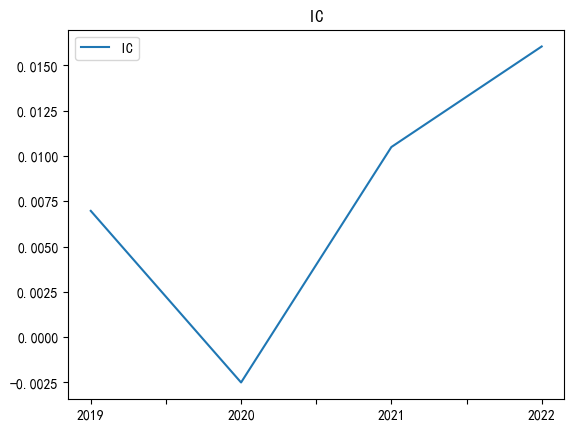

<Figure size 1000x200 with 0 Axes>

<Figure size 640x480 with 0 Axes>

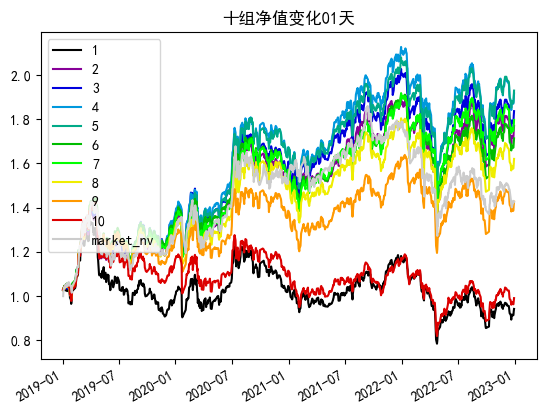

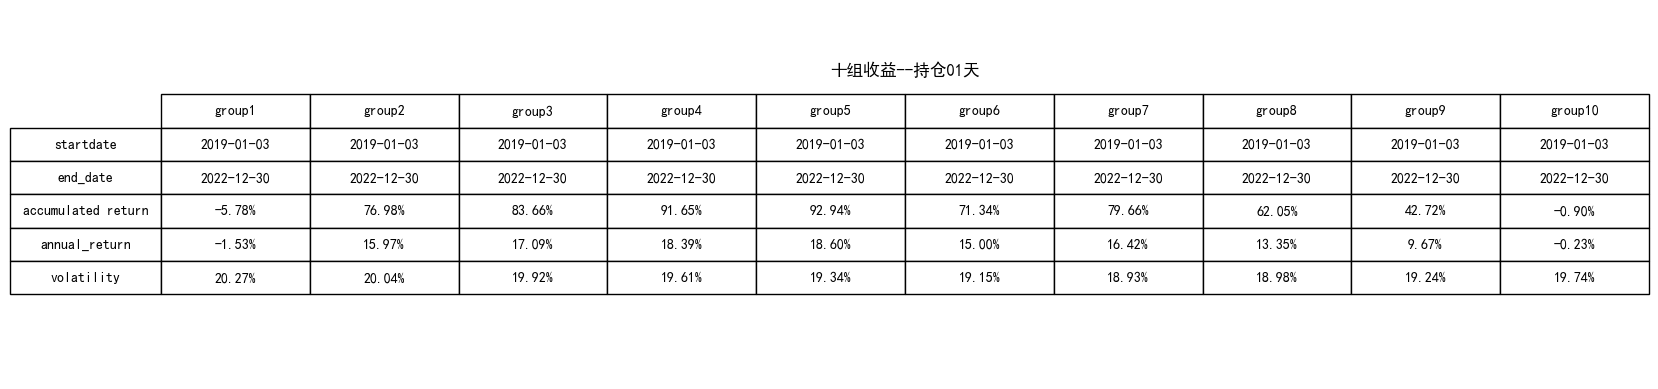

<Figure size 640x480 with 0 Axes>

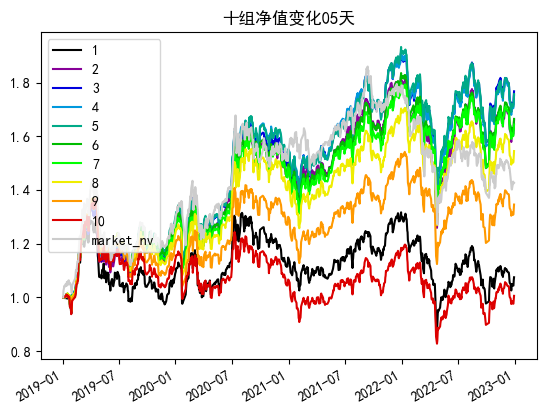

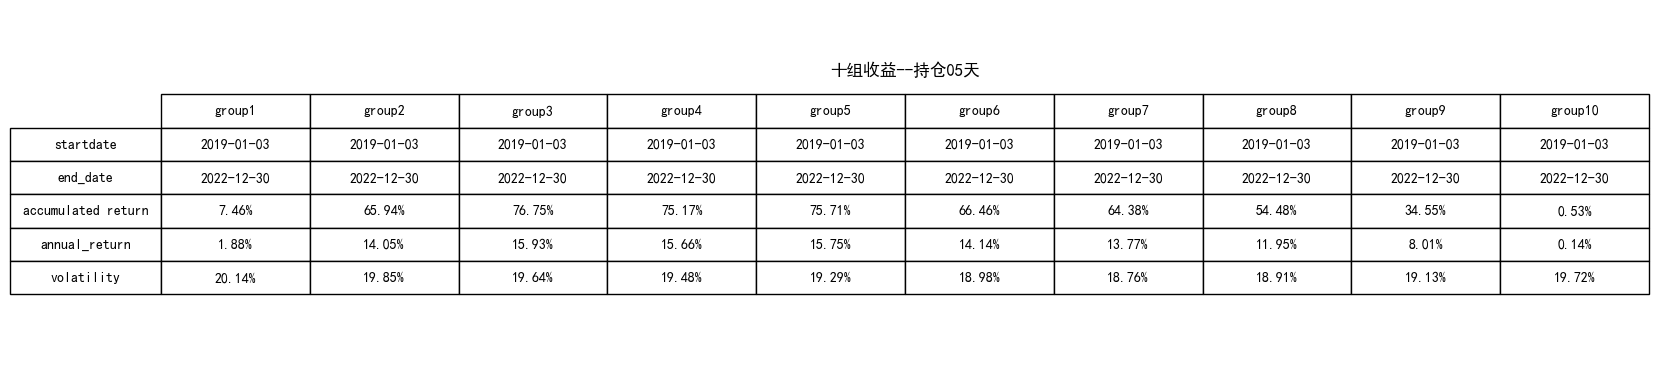

<Figure size 640x480 with 0 Axes>

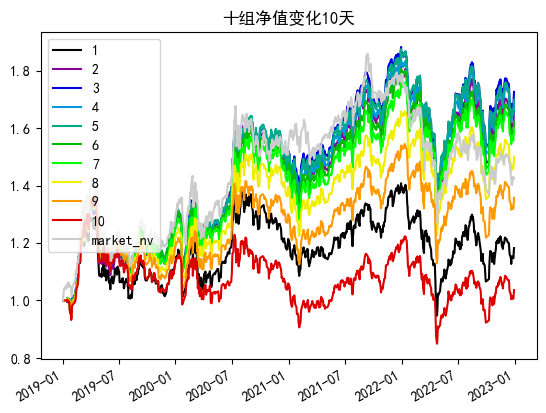

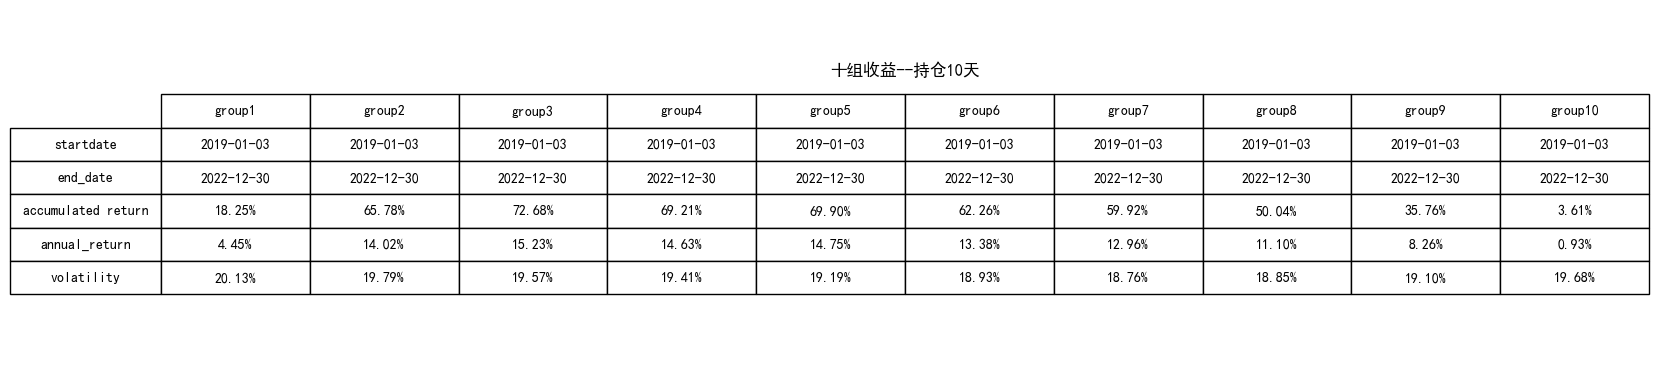

<Figure size 640x480 with 0 Axes>

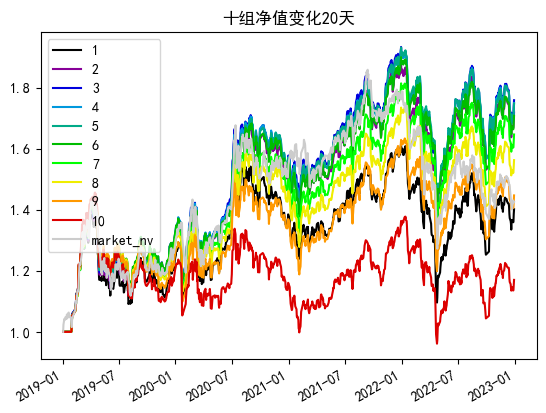

<Figure size 640x480 with 0 Axes>

<Figure size 1800x800 with 0 Axes>

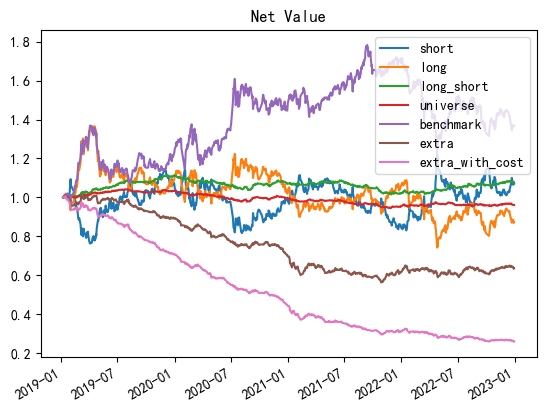

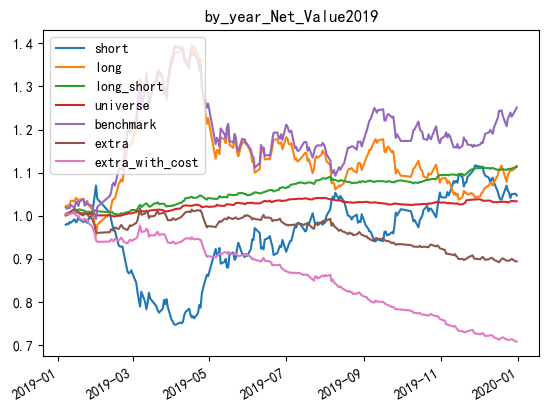

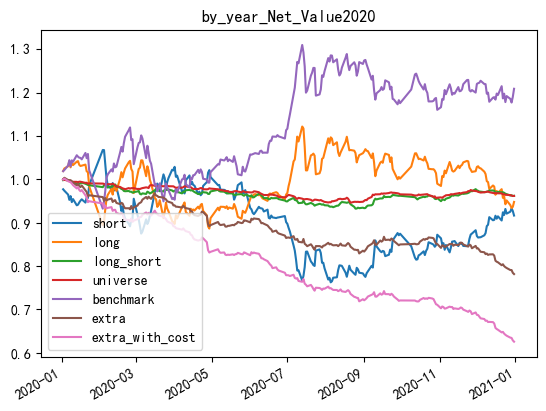

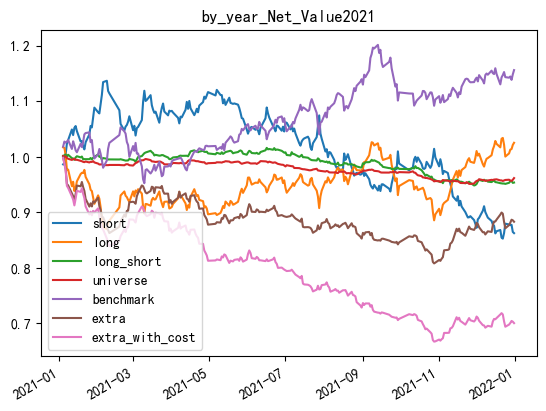

<Figure size 640x480 with 0 Axes>

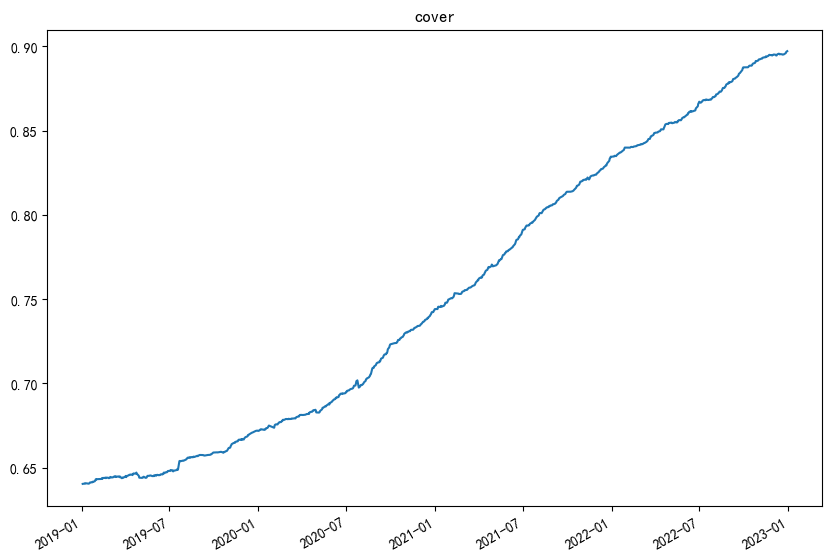

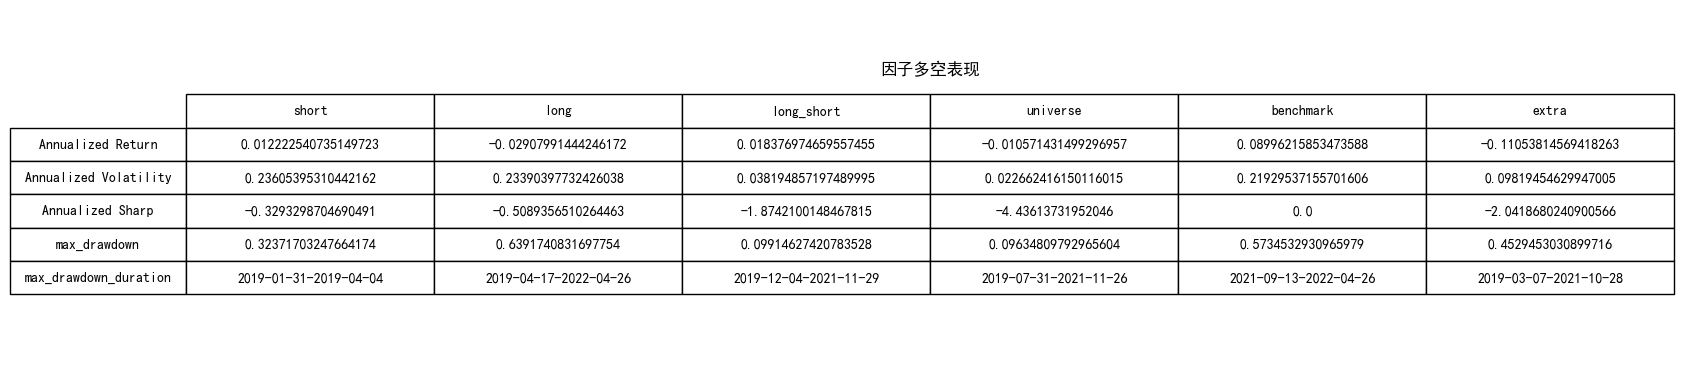

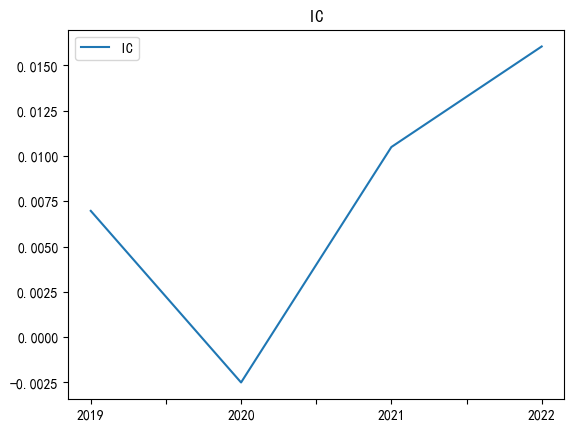

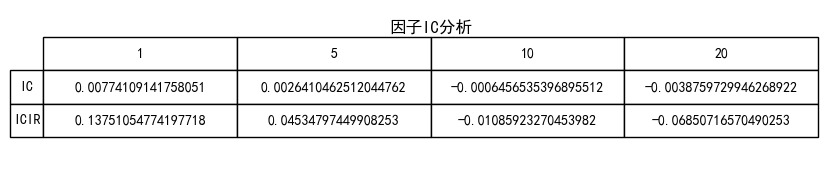

In [2]:
factor_path = "/data/disk4/output_stocks/jmchen/factors/transaction/all/mid_files/a-b.csv"
factor_name = 'a-b_small_neu'
result_path = "/data/disk4/output_stocks/jmchen/factors/transaction/performance/"
env_path = "/data/disk4/output_stocks/jmchen/backtool/"
os.makedirs(result_path, exist_ok = True)

factor = pd.read_csv(factor_path, index_col=0)
factor.index = pd.to_datetime(factor.index.astype('str'))
factor = factor.replace([np.inf,-np.inf], np.nan)

# factor1 = pd.read_csv('/data/disk4/output_stocks/jmchen/factors/transaction/mid_files/bid_mean.csv', index_col=0)
# factor1.index = pd.to_datetime(factor1.index.astype('str'))
# factor1 = factor1.replace([np.inf,-np.inf], np.nan)

# factor=(factor/factor1)

factor=factor.replace(0,np.nan)
#factor = factor.rolling(window=20, min_periods=15).mean()
# factor = factor.loc['2016-01-01':'2022-01-01']
env = Environment(
                    factor_name = factor_name,
                    factor = factor,
                    holding_periods = [1,5,10,20], 
                    save_path = result_path, 
                    env_pkl_path = env_path,
                    method='load',
                    if_neutral=['indus','size']
                    )
env.run_all()

funs = Functions(env)
funs.ic_calculating()
funs.run_all()
perform = Performance(result_path + factor_name)
perform.render()

In [ ]:
factor_path = "/data/disk4/output_stocks/jmchen/factors/shot/slope/entire_files/sl.csv"
factor_name = 'sl'
result_path = "/data/disk4/output_stocks/jmchen/factors/shot/slope/performance/"
env_path = "/data/disk4/output_stocks/jmchen/backtool/"
os.makedirs(result_path, exist_ok = True)

factor = pd.read_csv(factor_path, index_col=0)
factor.index = pd.to_datetime(factor.index.astype('str'))
factor = 1 * factor.replace([np.inf,-np.inf], np.nan)
# factor = 1 * factor.replace(0, np.nan)
#factor = factor.rolling(window=20, min_periods=15).mean()
# factor = factor.loc['2016-01-01':'2022-01-01']
env = Environment(
                    factor_name = factor_name,
                    factor = factor,
                    holding_periods = [1,5,10,20], 
                    save_path = result_path, 
                    env_pkl_path = env_path,
                    method='load',
                    if_neutral=None
                    )
env.run_all()

funs = Functions(env)
funs.ic_calculating()
funs.run_all()
perform = Performance(result_path + factor_name)
perform.render()

In [16]:

def two_factor_IC(path1,path2):
    df1=pd.read_csv(path1).set_index('date')
    df2=pd.read_csv(path2).set_index('date')
    # 计算相关系数并存储
    correlation_values = []
    # 对应列计算相关系数
    for col1, col2 in zip(df1.columns, df2.columns):
        correlation_values.append(df1[col1].corr(df2[col2]))
    correlation_values = [x for x in correlation_values if not math.isnan(x)]
    # 计算相关系数均值
    mean_correlation = sum(correlation_values) / len(correlation_values)
    # mean_correlation=correlation_values.mean()
    print(sum(correlation_values))
    # 输出相关系数和均值
    print("相关系数:", correlation_values)
    print("相关系数均值:", mean_correlation)
    return mean_correlation

ic=two_factor_IC(path1='/data/disk4/output_stocks/jmchen/factors/transaction/all/mid_files/bid_mean.csv',path2='/data/disk4/output_stocks/jmchen/factors/transaction/mid_files/bid_mean.csv')
ic

4981.822497205686
相关系数: [0.9994614921054714, 0.9995003132091105, 0.9999277881740424, 0.9998275384447899, 0.9997857228417877, 0.9998088874373697, 0.9998106422318279, 0.9999865894949216, 0.9984175524507382, 0.9998992658802781, 0.9998424989729002, 0.9997088538992849, 0.9998083401772712, 0.998471442834318, 0.9999794548180283, 0.9992845818912225, 0.9988568079266339, 0.9999751204290873, 0.9990463825477333, 0.9997772395076746, 0.9998544523494939, 0.9999155440047662, 0.999794170218328, 0.9990244194901371, 0.9997028977567465, 0.9999123290264013, 0.9996712218808558, 0.9999197822478456, 0.9994506251505036, 0.999786152452444, 0.9998888066625996, 0.9998015331500284, 0.9998896770527949, 0.9999206191787796, 0.9978060331509645, 0.9994915100440639, 0.9998711432028496, 0.9997207459507144, 0.9999289008551854, 0.999882357178259, 0.9995981132567293, 0.9994946173044634, 0.9998590158962513, 0.9994319259400001, 0.9991888000322507, 0.9997525409927954, 0.9995030010901127, 0.9989518748607878, 0.9995262529951926,

0.9983612218849071

In [9]:
df

,000001,000002,000004,000005,000006,000007,000008,000009,000010,000011,...,688787,688788,688789,688793,688798,688799,688800,688819,688981,689009
date,,,,,,,,,,,,,,,,,,,,,
20190103,9.303725,24.263575,16.276781,2.742358,5.212321,7.951307,3.885417,4.305542,3.326663,9.459872,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20190104,9.652177,24.679434,16.554242,2.759297,5.241436,7.916054,3.909098,4.331689,3.329967,9.501015,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20190107,9.745116,25.349251,17.002632,2.890257,5.384899,8.133068,4.106061,4.494809,3.402546,9.870158,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20190108,9.738413,25.154083,17.175583,2.910174,5.412862,8.030405,4.193997,4.549695,3.414475,9.880982,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20190109,10.005107,25.623572,17.039890,2.941768,5.436610,8.129284,4.165351,4.552404,3.431750,9.920622,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20221226,12.901388,18.459789,9.448943,1.860244,5.969503,7.834007,2.327537,12.680713,3.684029,11.665354,...,59.747586,36.306224,166.250979,52.151062,98.211856,33.223669,107.845079,36.069840,42.799117,32.815201
20221227,13.159529,18.735854,9.626190,1.900007,6.486852,7.764915,2.366617,12.370931,3.830168,12.039391,...,59.887867,36.810442,166.455416,52.282926,95.889091,32.133077,109.645683,36.751220,43.322990,32.741885
20221228,13.233215,18.596283,9.618639,1.883895,6.778139,7.824212,2.345981,12.181046,3.788484,12.107937,...,59.335322,36.324666,165.268430,52.123323,96.358673,31.959093,108.260253,36.802951,43.020942,32.572167


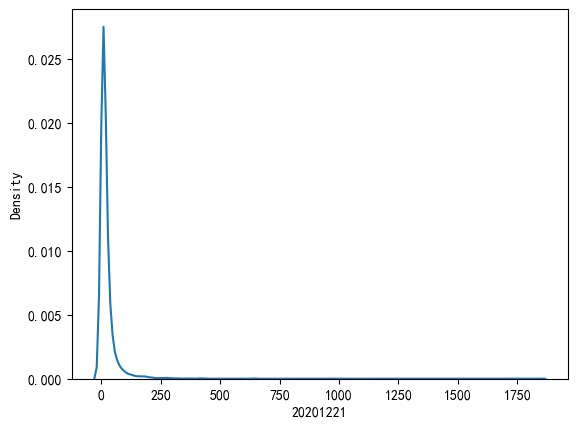

In [5]:
df=pd.read_csv('/data/disk4/output_stocks/jmchen/factors/transaction/all/mid_files/bid_mean_all.csv')
df=df.replace([np.inf,-np.inf], np.nan)
df.set_index('date',inplace=True)
s=df.loc[20201221]
sns.kdeplot(s)
plt.show()